<a href="https://colab.research.google.com/github/Pokulord/Chislo_Methods/blob/master/%22%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2_%D0%A7%D0%B5%D1%80%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 1. Метод наименших квадаратов. Парные эмперические зависимости**

**Черников Святослав Сергеевич**  
**РИ-321055**  
**17 вариант**

##1.Метод наименших квадаратов

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

1. Сгенерируем набор точек разбросанных относительно прямой лини. Уравнение прямой y = 2*x + 4. Отклонение сгенерируем по нормальному закону.

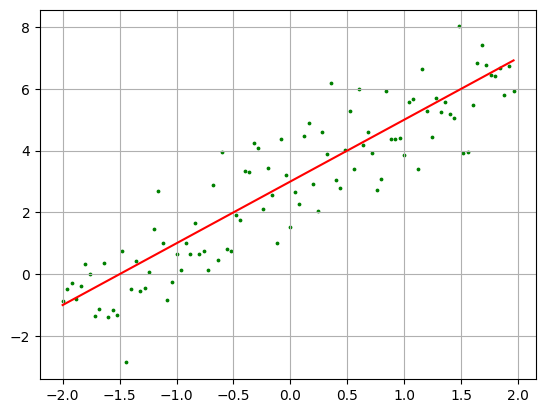

In [10]:
N = 100    # число наблюдений (выборка данных)
sigma = 1  # стандартное отклонение (разброс) наблюдаемых значений
a0 = 2    # теоретическое значение параметра a
b0 = 3       # теоретическое значение параметра b
x0,xn= -2,2 # диапазон значений

x = np.array(range(N))/N*(xn-x0)+x0
f = np.array([a0*z+b0 for z in x])
y = f + np.random.normal(0, sigma, N)

plt.plot(x,f,c='red')
plt.scatter(x,y,s=3,c='green')
plt.grid(True)
plt.show()


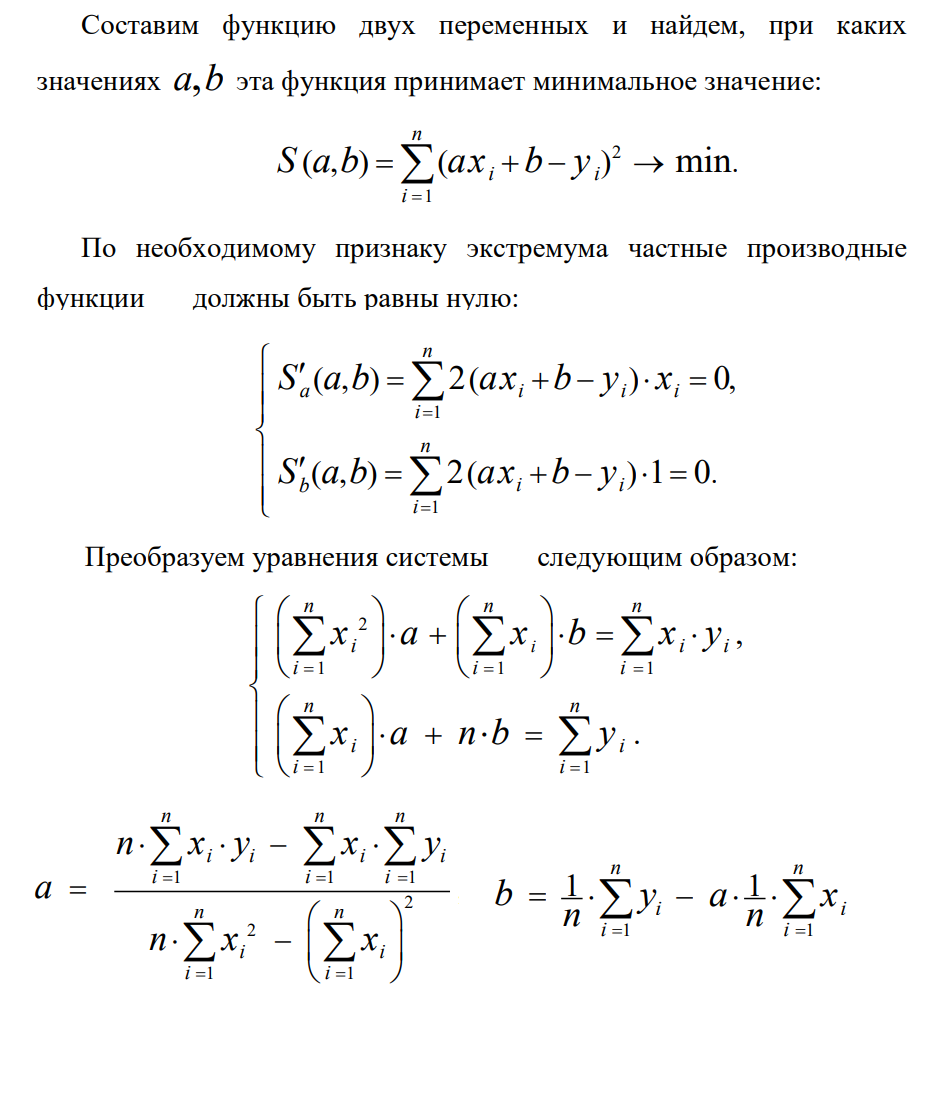

In [11]:
mx = x.sum()/N
my = y.sum()/N
sxx = np.dot(x.T, x)/N
sxy = np.dot(x.T, y)/N

an = (sxy - mx*my)/(sxx - mx**2)
bn = my - an*mx
fn = np.array([an*i+bn for i in x])


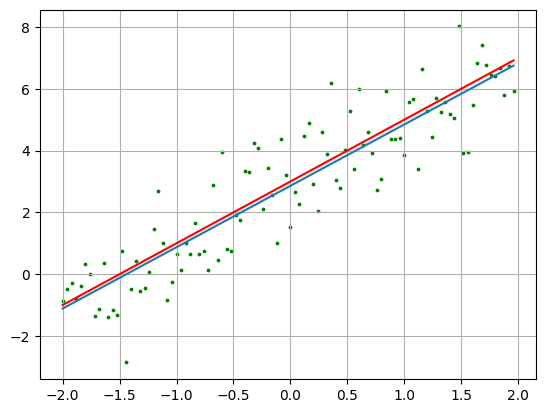

In [12]:
plt.plot(x,f,c='red')
plt.scatter(x,y,s=3,c='green')
plt.grid(True)
plt.plot(x,fn)
plt.show()



## Задание1
1. Как можно оценить качество модели?
2. Постройте график остатков (разность между исходными данными и моделью).
3. Рассчитайте стандартное отклонение остатков sfn.
4. Реализовать МНК для параболы.

1. Метод наименших квадратов лекция
https://youtu.be/8sVfWyQrMiM

2. Учебник
https://disk.yandex.ru/i/NP805WC1m3DAHQ
(стр. 31, 3. Коэффициенты корреляции, регрессии и корреляционное отношение при линейной зависимости взаимосвязаны. формулы 2.20-2.23)

Для оценки качества модели можно сравнить заданное стандратное отклонение со стандартным отклонением остатков (1 и ~0,95-1,1 соответственно), а также рассчитать коэффициент кореляции, который должен стремиться к 1 (в рамках задания вышло ~0,91-0,92).

In [14]:

print(f"Коэффициент корреляции:{np.corrcoef(x, y)[1, 0]:.5f}")

Коэффициент корреляции:0.90593


**График остатков**

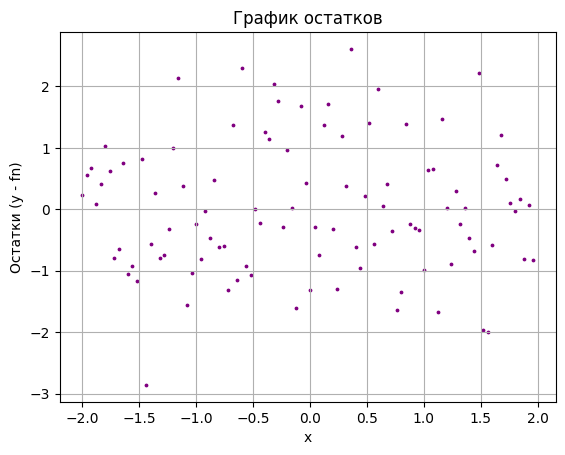

In [17]:
#График остатков
for_remains_graph = y - fn  #Разность между исходными данными и моделью

plt.scatter(x, for_remains_graph, s=3, c='purple')
plt.title("График остатков")
plt.xlabel("x")
plt.ylabel("Остатки (y - fn)")
plt.grid(True)
plt.show()

In [22]:
# Стандартное отклонение остатков
sfn = np.sqrt(np.sum(for_remains_graph**2) / (N - 2)) #Берём 2, в силу количества наблюдений
print(f"Стандартное отклонение остатков sfn: {sfn:.5f}")

Стандартное отклонение остатков sfn: 1.08276


**МНК для параболы**

In [24]:
# Исходные данные
a0 = 1  # теоретический коэффициент при x^2
b0 = 2  # теоретический коэффициент при x
c0 = 3  # свободный член
x0,xn= -5,3 # диапазон значений

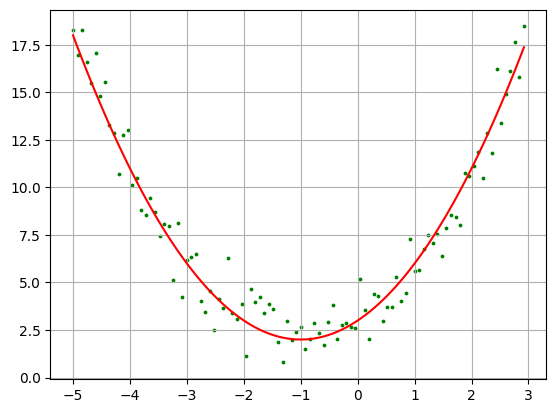

In [26]:
x = np.array(range(N)) / N * (xn - x0) + x0
f = np.array([a0 * z**2 + b0 * z + c0 for z in x])
y = f + np.random.normal(0, sigma, N)

# Построение исходной параболы
plt.plot(x, f, c='red', label="Теоретическая парабола")
plt.scatter(x, y, s=3, c='green', label="Наблюдения")
plt.grid(True)
plt.show()

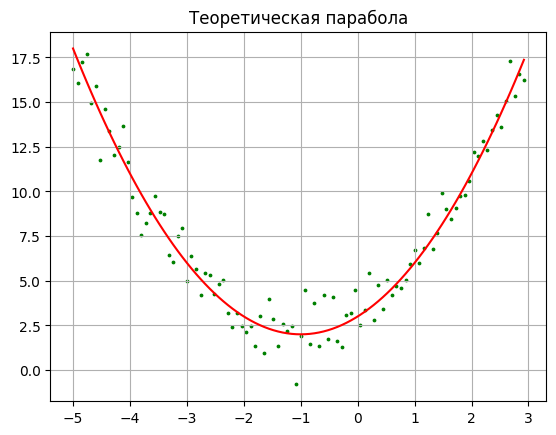

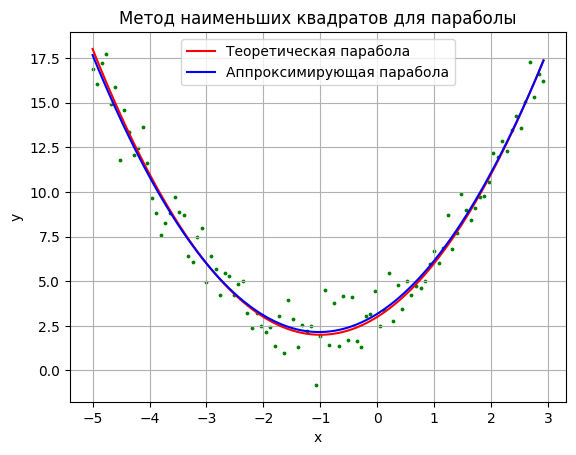

In [29]:
import numpy as np
import matplotlib.pyplot as plt


class MNK_PARABOLIC:
    def __init__(self):
        # Исходные данные
        self.N = 100    # число наблюдений (выборка данных)
        self.sigma = 1  # стандартное отклонение (разброс) наблюдаемых значений
        self.a0 = 2    # теоретическое значение параметра a
        self.b0 = 3       # теоретическое значение параметра b
        self.a0 = 1  # теоретический коэффициент при x^2
        self.b0 = 2  # теоретический коэффициент при x
        self.c0 = 3  # свободный член
        self.x0,self.xn= -5,3 # диапазон значений
        self.for_graph_counts()
        self.draw_orgn_parab()
        self.draw_aprx_graph()

    def draw_aprx_graph(self):
        # График с исходными данными и аппроксимирующей параболой
        plt.plot(self.x, self.f, c='red', label="Теоретическая парабола")
        plt.plot(self.x, self.fn_parabola, c='blue', label="Аппроксимирующая парабола")
        plt.scatter(self.x, self.y, s=3, c='green')
        plt.title("Метод наименьших квадратов для параболы")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.grid(True)
        plt.show()

    def draw_orgn_parab(self):
        # Построение исходной параболы
        plt.plot(self.x, self.f, c='red', label="Теоретическая парабола")
        plt.title("Теоретическая парабола")
        plt.scatter(self.x, self.y, s=3, c='green', label="Наблюдения")
        plt.grid(True)
        plt.show()

    def for_graph_counts(self):
        self.x = np.array(range(self.N)) / self.N * (self.xn -self.x0) + self.x0
        self.f = np.array([self.a0 * z**2 + self.b0 * z + self.c0 for z in self.x])
        self.y = self.f + np.random.normal(0, self.sigma, self.N)


        self.mx = self.x.sum()/self.N
        self.my = self.y.sum()/self.N
        self.mx2 = (self.x**2).sum()/self.N
        self.mx3 = (self.x**3).sum()/self.N
        self.mx4 = (self.x**4).sum()/self.N
        self.mxy = (self.x * self.y).sum()/self.N
        self.mx2y = (self.x**2 * self.y).sum()/self.N

        # Решение системы уравнений для коэффициентов a, b и c
        self.A = np.array([
            [self.mx4, self.mx3, self.mx2],
            [self.mx3, self.mx2, self.mx],
            [self.mx2, self.mx, 1]
        ])

        self.B = np.array([self.mx2y,self.mxy, self.my])

        a_parabola, b_parabola, c_parabola = np.linalg.solve(self.A, self.B)

        # Построение параболической модели
        self.fn_parabola = np.array([a_parabola * i**2 + b_parabola * i + c_parabola for i in self.x])


if __name__ == "__main__":
    MNK_PARABOLIC()

## 2. Доверительные интервалы линейной модели и доверительная область прогнозных оценок
Теорию изучаем в учебнике https://disk.yandex.ru/i/NP805WC1m3DAHQ (глава 2.4)
## Задание 2


1.   Постройте доверительные интервалы для линейной
2.   Постройте доверительную область прогнозных оценок
3.   Выведите на одном графике эксперементальные данные (точки), линейную модель, доверительные интервалы линейной модели и доверительную область прогнозных оценок.
4.   Постройте линейну модель с доверительными интервалами и областью прогнозных оценок зависимости аукционных цен на марочные вина от срока их выдержики (2.5)
5.   Построить линейную модель для своего варианта https://disk.yandex.ru/i/Jc9lpl44JzrNIA







**Построение доверительного интервала, доверительной области прогнозных оценок, а также отображение экспериментальных данных и линейной модели функции y=2x+4.**

In [30]:
N = 100    # число наблюдений (выборка данных)
sigma = 1  # стандартное отклонение (разброс) наблюдаемых значений
a0 = 2    # теоретическое значение параметра a
b0 = 3       # теоретическое значение параметра b
x0,xn= -2,2 # диапазон значений

x = np.array(range(N))/N*(xn-x0)+x0
f = np.array([a0*z+b0 for z in x])
y = f + np.random.normal(0, sigma, N)

mx = x.sum()/N
my = y.sum()/N
sxx = np.dot(x.T, x)/N
sxy = np.dot(x.T, y)/N

an = (sxy - mx*my)/(sxx - mx**2)
bn = my - an*mx
fn = np.array([an*i+bn for i in x])

ostatki = y - fn

sfn = np.sqrt(np.sum(ostatki**2) / (N - 2))

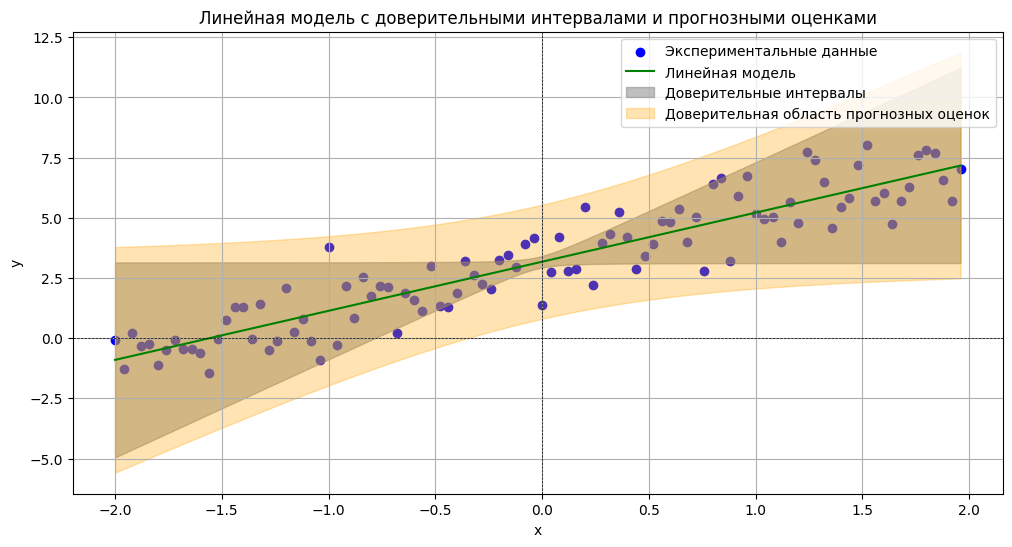

Коэффициент корреляции:0.92217


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

class Dov_Int_draw:
    def __init__(self):
        self.N = 100    # число наблюдений (выборка данных)
        self.sigma = 1  # стандартное отклонение (разброс) наблюдаемых значений
        self.a0 = 2    # теоретическое значение параметра a
        self.b0 = 3       # теоретическое значение параметра b
        x0,xn= -2,2 # диапазон значений

        self.x = np.array(range(self.N))/self.N*(xn-x0)+x0
        f = np.array([self.a0*z+self.b0 for z in self.x])
        self.y = f + np.random.normal(0, self.sigma, self.N)

        self.mx = self.x.sum()/self.N
        my = self.y.sum()/self.N
        self.sxx = np.dot(self.x.T, self.x)/self.N
        sxy = np.dot(self.x.T, self.y)/self.N

        an = (sxy - self.mx*my)/(self.sxx - self.mx**2)
        bn = my - an*self.mx
        self.fn = np.array([an*i+bn for i in self.x])

        remains = self.y - self.fn

        self.sfn = np.sqrt(np.sum(remains**2) / (self.N - 2))

        self.draw_graph()

    def draw_graph(self):
        # Уровень доверия
        alpha = 0.02
        #z_crit = 1.98  # Используем фиксированное значение для 95% доверительного интервала и выборки 100
        t_crit = t.ppf(1 - alpha / 2, self.N - 2)

        # Доверительные интервалы для предсказанных значений
        y_upper = self.fn + t_crit * self.sfn * np.sqrt(1/self.N + (self.x - self.mx)**2 / self.sxx)
        y_lower = self.fn - t_crit * self.sfn * np.sqrt(1/self.N + (self.x - self.mx)**2 / self.sxx)

        # Доверительная область прогнозных оценок
        pred_interval_upper = self.fn + t_crit * self.sfn * np.sqrt(1 + 1/self.N + (self.x - self.mx)**2 / self.sxx)
        pred_interval_lower = self.fn - t_crit * self.sfn * np.sqrt(1 + 1/self.N + (self.x - self.mx)**2 / self.sxx)

        # Визуализация
        plt.figure(figsize=(12, 6))
        plt.scatter(self.x, self.y, color='blue', label='Экспериментальные данные')
        plt.plot(self.x, self.fn, color='green', label='Линейная модель')
        plt.fill_between(self.x, y_upper, y_lower, color='gray', alpha=0.5, label='Доверительные интервалы')
        plt.fill_between(self.x, pred_interval_upper, pred_interval_lower, color='orange', alpha=0.3, label='Доверительная область прогнозных оценок')
        plt.title('Линейная модель с доверительными интервалами и прогнозными оценками')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axhline(0, color='black', lw=0.5, ls='--')
        plt.axvline(0, color='black', lw=0.5, ls='--')
        plt.legend()
        plt.grid()
        plt.show()

        print(f"Коэффициент корреляции:{np.corrcoef(self.x,self.y)[1, 0]:.5f}")


if __name__ == "__main__":
    Dov_Int_draw()

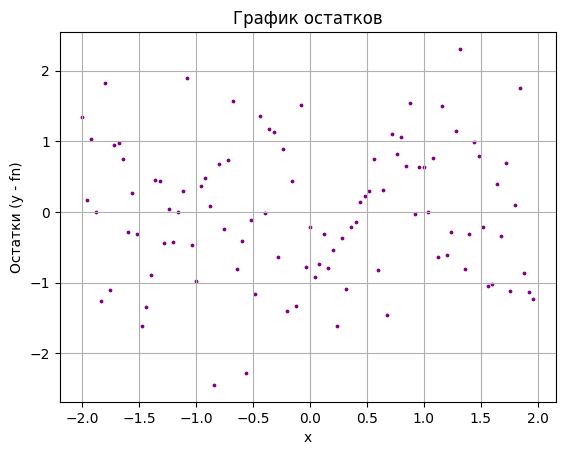

In [38]:
#График остатков
remains = y - fn  #Разность между исходными данными и моделью

plt.scatter(x, remains, s=3, c='purple')
plt.title("График остатков")
plt.xlabel("x")
plt.ylabel("Остатки (y - fn)")
plt.grid(True)
plt.show()

**Итого:** коэффициент корреляции получился ~0,922. Это показывает достойное качество построения модели. Нельзя не подметить, что график остатков не имеет нелинейной зависимости, лишь вид шума.

**Построение линейной модели с доверительными интервалами и областью прогнозных оценок зависимости аукционных цен на марочные вина от срока их выдержики.**

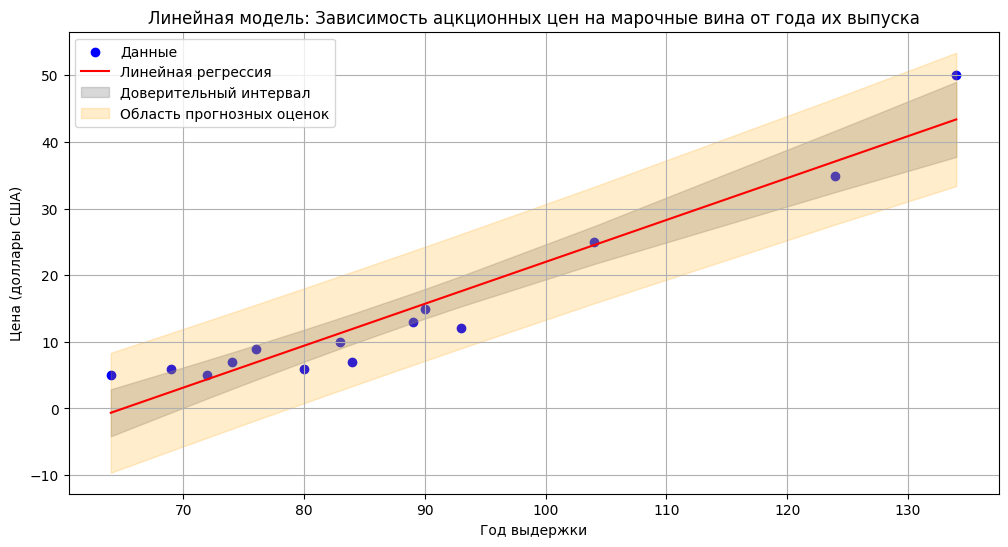

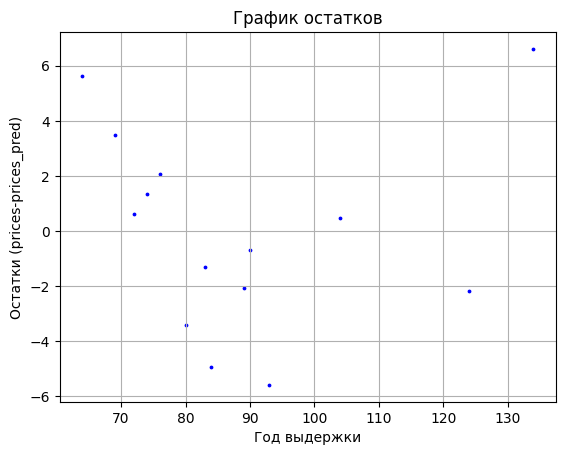

Коэффициент корреляции: 0.96136


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t


class Vines:
    def __init__(self):
        # Данные
        self.years = np.array([134, 124, 104, 93, 90, 89, 84, 83, 80, 76, 74, 72, 69, 64])
        self.prices = np.array([50, 34.90, 25, 12, 15, 13, 6.98, 10, 5.99, 8.98, 6.98, 4.99, 5.98, 4.98])
        self.n = len(self.years)
        self.alpha = 0.05
        self.calculations()
        self.draw_graph()
        print(f"Коэффициент корреляции: {np.corrcoef(self.years, self.prices)[1, 0]:.5f}")

    def calculations(self):
        # Рассчитываем средние значения
        self.x_mean = np.mean(self.years)
        self.y_mean = np.mean(self.prices)

        # Вычисляем параметры линейной регрессии
        b1 = np.sum((self.years - self.x_mean) * (self.prices - self.y_mean)) / np.sum((self.years - self.x_mean) ** 2)
        b0 = self.y_mean - b1 * self.x_mean

        # Предсказанные значения
        self.prices_pred = b0 + b1 * self.years

        # Стандартная ошибка
        s = np.sqrt(np.sum((self.prices - self.prices_pred) ** 2) / (self.n - 2))

        # Критическое значение t
        t_crit = t.ppf(1 - self.alpha / 2, self.n - 2)

        # Вычисляем доверительный и прогнозный интервалы
        self.ci_upper = []
        self.ci_lower = []
        self.pi_upper = []
        self.pi_lower = []

        for x in self.years:
            # Расчет доверительного интервала
            margin_ci = t_crit * s * np.sqrt(1/self.n + (x - self.x_mean) ** 2 / np.sum((self.years - self.x_mean) ** 2))
            self.ci_upper.append(b0 + b1 * x + margin_ci)
            self.ci_lower.append(b0 + b1 * x - margin_ci)

            # Расчет прогнозного интервала
            margin_pi = t_crit * s * np.sqrt(1 + 1/self.n + (x - self.x_mean) ** 2 / np.sum((self.years - self.x_mean) ** 2))
            self.pi_upper.append(b0 + b1 * x + margin_pi)
            self.pi_lower.append(b0 + b1 * x - margin_pi)

    def draw_graph(self):
        # Построение графика
        plt.figure(figsize=(12, 6))
        plt.scatter(self.years, self.prices, color="blue", label="Данные")
        plt.plot(self.years, self.prices_pred, color="red", label="Линейная регрессия")

        # Добавляем доверительные и прогнозные интервалы
        plt.fill_between(self.years, self.ci_lower, self.ci_upper, color="gray", alpha=0.3, label="Доверительный интервал")
        plt.fill_between(self.years, self.pi_lower, self.pi_upper, color="orange", alpha=0.2, label="Область прогнозных оценок")

        # Оформление графика
        plt.xlabel("Год выдержки")
        plt.ylabel("Цена (доллары США)")
        plt.title("Линейная модель: Зависимость ацкционных цен на марочные вина от года их выпуска")
        plt.legend()
        plt.grid()
        plt.show()
        #График остатков
        plt.scatter(self.years, self.prices-self.prices_pred, s=3, c='blue')
        plt.title("График остатков")
        plt.xlabel("Год выдержки")
        plt.ylabel("Остатки (prices-prices_pred)")
        plt.grid(True)
        plt.show()



if __name__ == "__main__":
    Vines()

**Итого:** коэффициент корреляции получился ~0,961, что свидетельствует о хорошем качестве модели. В то же время график остатков имеет нелинейную зависимость в виде параболы, что не есть хорошо.

**Построение зависимости цен полезной площади от её размера для зданий в хорошем состоянии
(3 вариант)**

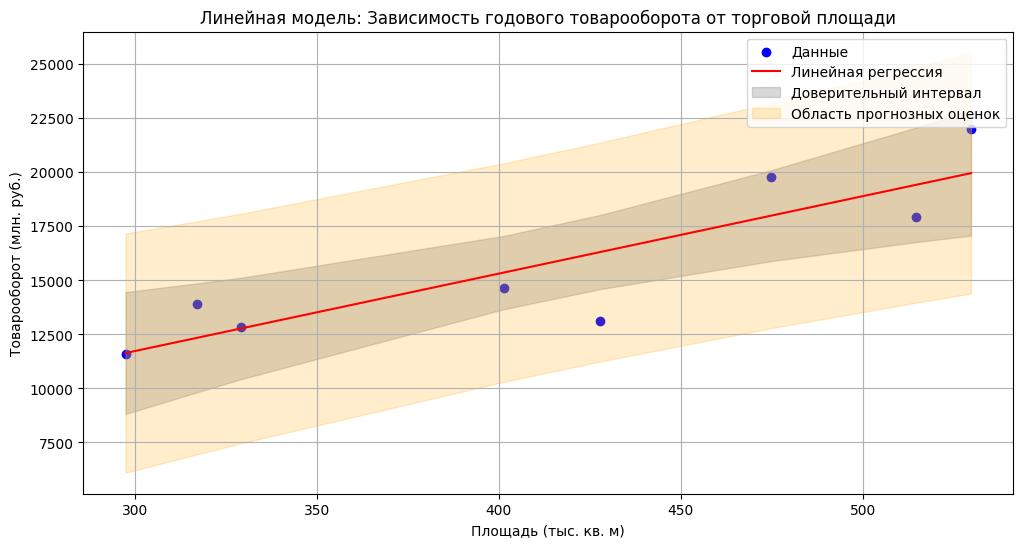

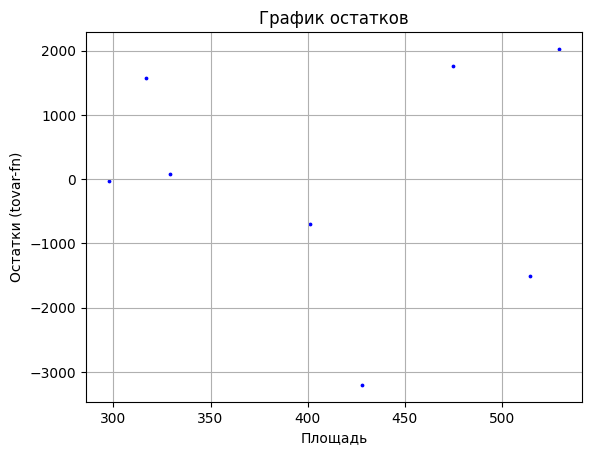

Коэффициент корреляции: 0.8746885894998937


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t



class Squares_and_prices:
    def __init__(self):
        # Данные
        self.square = np.array([297.5, 317.0, 329.2, 401.4, 427.9, 474.9, 514.5, 529.7])
        self.tovar = np.array([11600.0, 13900.0, 12850.0, 14650.0, 13100.0, 19750.0, 17900.0, 21977])
        self.n = len(self.square)
        self.alpha = 0.05
        self.counts()
        self.draw_graph()
        print("Коэффициент корреляции:", np.corrcoef(self.square, self.tovar)[1, 0])

    def counts(self):
        # Рассчитываем средние значения
        x_mean = np.mean(self.square)
        y_mean = np.mean(self.tovar)

        # Вычисляем параметры линейной регрессии
        b1 = np.sum((self.square - x_mean) * (self.tovar - y_mean)) / np.sum((self.square - x_mean) ** 2)
        b0 = y_mean - b1 * x_mean

        self.fn = b0 + b1 * self.square

        # Стандартная ошибка
        s = np.sqrt(np.sum((self.tovar - self.fn) ** 2) / (self.n - 2))

        # Критическое значение t
        t_crit = t.ppf(1 - self.alpha / 2, self.n - 2)

        # Вычисляем доверительный и прогнозный интервалы
        self.ci_upper = []
        self.ci_lower = []
        self.pi_upper = []
        self.pi_lower = []

        for x in self.square:
            # Расчет доверительного интервала
            margin_ci = t_crit * s * np.sqrt(1/self.n + (x - x_mean) ** 2 / np.sum((self.square - x_mean) ** 2))
            self.ci_upper.append(b0 + b1 * x + margin_ci)
            self.ci_lower.append(b0 + b1 * x - margin_ci)

            # Расчет прогнозного интервала
            margin_pi = t_crit * s * np.sqrt(1 + 1/self.n + (x - x_mean) ** 2 / np.sum((self.square - x_mean) ** 2))
            self.pi_upper.append(b0 + b1 * x + margin_pi)
            self.pi_lower.append(b0 + b1 * x - margin_pi)

    def draw_graph(self):
        # Построение графика
        plt.figure(figsize=(12, 6))
        plt.scatter(self.square, self.tovar, color="blue", label="Данные")
        plt.plot(self.square, self.fn, color="red", label="Линейная регрессия")

        # Добавляем доверительные и прогнозные интервалы
        plt.fill_between(self.square, self.ci_lower, self.ci_upper, color="gray", alpha=0.3, label="Доверительный интервал")
        plt.fill_between(self.square, self.pi_lower, self.pi_upper, color="orange", alpha=0.2, label="Область прогнозных оценок")

        # Оформление графика
        plt.xlabel("Площадь (тыс. кв. м)")
        plt.ylabel("Товарооборот (млн. руб.)")
        plt.title("Линейная модель: Зависимость годового товарооборота от торговой площади")
        plt.legend()
        plt.grid()
        plt.show()
        #График остатков
        plt.scatter(self.square, self.tovar-self.fn, s=3, c='blue')
        plt.title("График остатков")
        plt.xlabel("Площадь")
        plt.ylabel("Остатки (tovar-fn)")
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    Squares_and_prices()

**Итого:** коэффициент корреляции получился ~0,875, что свидетельствует о хорошем качестве модели. Также график остатков не имеет нелинейной зависимости, лишь вид шума.